### Small Image Classification Using Convolutional Neural Network (CNN)
In this notebook, we will classify small images cifar10 dataset from tensorflow keras datasets. There are total 10 classes as shown below. We will use CNN for classification

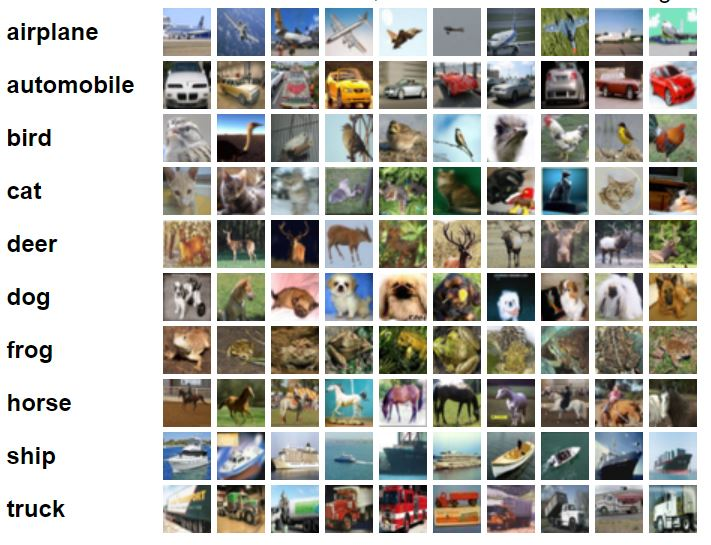

In [2]:
#Import library
from IPython.display import Image
# Load image from local storage
Image(filename = "small_images_cnn.jpg", width = 600, height = 300)

In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [5]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170500096/170498071 [==============================] - 818s 5us/step


(50000, 32, 32, 3)

In [6]:
X_test.shape

(10000, 32, 32, 3)

Here we see there are 50000 training images and 1000 test images

In [7]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [8]:
# y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [9]:
y_test = y_test.reshape(-1,)

classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [10]:
# Let's plot some images to see what they are

def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

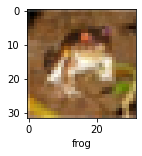

In [11]:
plot_sample(X_train, y_train, 0)

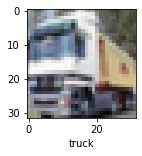

In [12]:
plot_sample(X_train, y_train, 1)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

In [13]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [14]:
# Build simple artificial neural network for image classification
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid')    
    ])

ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 75s 42ms/step - loss: 1.9294 - accuracy: 0.3002
Epoch 2/5
1563/1563 [==============================] - 67s 43ms/step - loss: 1.6462 - accuracy: 0.4170
Epoch 3/5
1563/1563 [==============================] - 68s 44ms/step - loss: 1.5549 - accuracy: 0.4527
Epoch 4/5
1563/1563 [==============================] - 74s 47ms/step - loss: 1.4848 - accuracy: 0.4766
Epoch 5/5
1563/1563 [==============================] - 68s 43ms/step - loss: 1.4312 - accuracy: 0.4971


You can see that at the end of 5 epochs, accuracy is at around **49.71%**

In [15]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.49      0.56      0.52      1000
           1       0.65      0.48      0.56      1000
           2       0.36      0.39      0.38      1000
           3       0.38      0.29      0.33      1000
           4       0.36      0.55      0.43      1000
           5       0.47      0.32      0.38      1000
           6       0.51      0.55      0.52      1000
           7       0.64      0.47      0.54      1000
           8       0.48      0.73      0.58      1000
           9       0.61      0.47      0.53      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.48     10000
weighted avg       0.50      0.48      0.48     10000



##### Now let us build a convolutional neural network to train our images

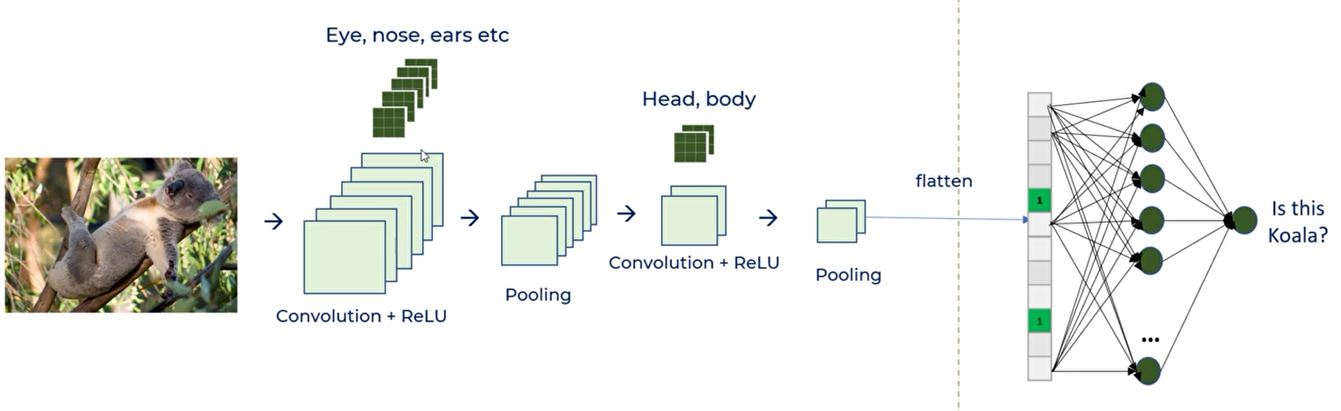

In [20]:
# Load image from local storage
Image(filename = "cnn.jpg", width = 900, height = 500)

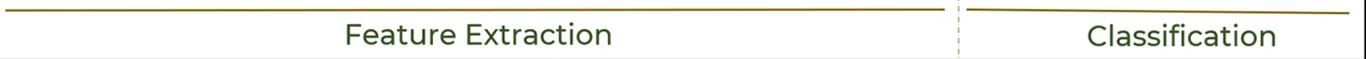

In [21]:
Image(filename = "cnn1.jpg", width = 900, height = 500)

In [16]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 32s 20ms/step - loss: 1.6751 - accuracy: 0.3855
Epoch 2/10
1563/1563 [==============================] - 35s 22ms/step - loss: 1.1155 - accuracy: 0.60831s
Epoch 3/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.9653 - accuracy: 0.66610s - loss: 0.965
Epoch 4/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.8620 - accuracy: 0.7007
Epoch 5/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.7805 - accuracy: 0.7294
Epoch 6/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.7304 - accuracy: 0.74470s - loss: 0.7304 - accuracy: 0.74
Epoch 7/10
1563/1563 [==============================] - 35s 23ms/step - loss: 0.6696 - accuracy: 0.7669
Epoch 8/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.6161 - accuracy: 0.7822
Epoch 9/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.5670 - accuracy: 0.8012
Epoch 10/10


##### With CNN, at the end 5 epochs, accuracy was at around 81.50% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features

In [22]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.9053 - accuracy: 0.7113


[0.9052630662918091, 0.7113000154495239]

In [23]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[2.8954755e-05, 1.7088665e-05, 8.2322142e-05, 8.3352053e-01,
        2.9386219e-05, 1.2987669e-01, 2.3582552e-02, 7.9114463e-05,
        1.1682200e-02, 1.1012044e-03],
       [3.7435652e-04, 3.7865753e-03, 1.9710511e-07, 1.0617053e-07,
        3.2387243e-07, 1.6005759e-09, 4.0003467e-09, 1.1953827e-06,
        9.9582279e-01, 1.4434456e-05],
       [1.2978509e-01, 2.9380786e-01, 8.9279638e-04, 5.0603300e-03,
        4.0247571e-03, 5.6795421e-04, 2.6507783e-04, 1.6085144e-02,
        4.7453019e-01, 7.4980840e-02],
       [8.9121175e-01, 3.1469204e-03, 1.1964359e-02, 4.1226172e-03,
        3.7949696e-02, 1.9006722e-05, 1.2490663e-05, 4.3108677e-03,
        4.7084730e-02, 1.7754226e-04],
       [1.9961988e-06, 1.9742609e-05, 2.6558764e-02, 1.4340485e-02,
        6.8595207e-01, 4.6860110e-03, 2.6843023e-01, 2.2115764e-06,
        7.3179231e-06, 1.1649300e-06]], dtype=float32)

In [24]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [25]:
# actual values
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

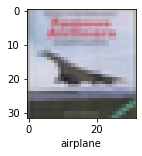

In [26]:
plot_sample(X_test, y_test,3)

In [27]:
classes[y_classes[3]]

'airplane'